<a href="https://colab.research.google.com/github/hruthiksiva/ml-algorithms/blob/main/label_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.semi_supervised import LabelPropagation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
digits = load_digits()

In [7]:
X = digits.data
y = digits.target

In [8]:
# Randomly mask some labels to create a semi-supervised scenario
rng = np.random.RandomState(42)
mask = rng.rand(len(y)) < 0.7  # Keep 70% labels as unlabeled
y[~mask] = -1  # Assign -1 to unlabeled data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
model = LabelPropagation(kernel='knn',n_neighbors=7)

In [11]:
model.fit(X_train,y_train)

LabelPropagation(kernel='knn')

In [12]:
y_pred = model.predict(X_test)

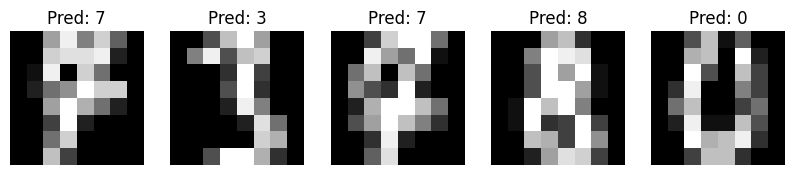

In [14]:
# Visualize some results
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray)
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

In [ ]:
# Limited to transductive learning; cannot generalize to unseen data.
